In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tqdm.keras import TqdmCallback

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [3]:
print(len(train_data.columns))
print(train_data.describe())
print(train_data.isnull)

21
       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00

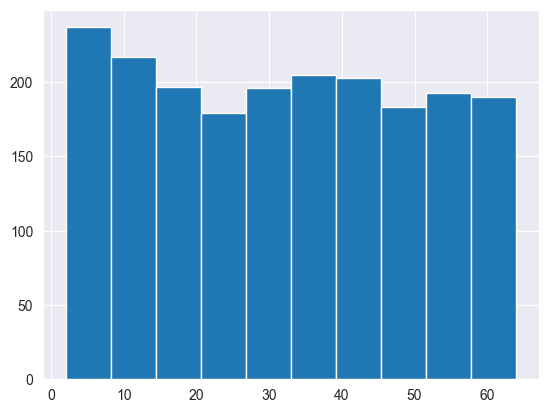

In [4]:
train_data["int_memory"].hist()
plt.show()

In [5]:
for column in train_data.columns:
    print(train_data[column].mean())
    train_null = train_data[column].isnull().sum()
    if train_null > 0:
        print(column + ": " + str(train_null))

1238.5185
0.495
1.52225
0.5095
4.3095
0.5215
32.0465
0.50175
140.249
4.5205
9.9165
645.108
1251.5155
2124.213
12.3065
5.767
11.011
0.7615
0.503
0.507
1.5


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc


sns.pairplot(train_data[["battery_power", "clock_speed"]], height=6)
plt.show()

In [7]:
model_train, model_test  = train_test_split(train_data, test_size=0.2)
y_train = model_train["price_range"]
x_train = model_train.drop(columns=["price_range"])

y_test = model_test["price_range"]
x_test = model_test.drop(columns=["price_range"])
print("y_train ", y_train.shape, "x_train ", x_train.shape)

y_train  (1600,) x_train  (1600, 20)


In [8]:
for col in x_train.columns:
    x_train[col] = x_train[col]/x_train[col].abs().max()
    x_test[col] = x_test[col]/x_test[col].abs().max()

In [9]:
x_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0000,1600.000000
mean,0.614882,0.501875,0.503437,0.51125,0.229342,0.514375,0.503887,0.499625,0.698756,0.563906,0.494531,0.325928,0.624901,0.527688,0.647368,0.319653,0.548781,0.757500,0.5125,0.510625
std,0.220316,0.500153,0.270876,0.50003,0.228616,0.499950,0.282740,0.289767,0.179230,0.283031,0.301362,0.229468,0.217076,0.270782,0.221529,0.239613,0.273244,0.428729,0.5000,0.500043
min,0.250751,0.000000,0.166667,0.00000,0.000000,0.000000,0.031250,0.100000,0.400000,0.125000,0.000000,0.000000,0.250376,0.064032,0.263158,0.000000,0.100000,0.000000,0.0000,0.000000
25%,0.421421,0.000000,0.233333,0.00000,0.052632,0.000000,0.250000,0.200000,0.538750,0.375000,0.250000,0.137628,0.435528,0.295773,0.473684,0.111111,0.300000,1.000000,0.0000,0.000000
50%,0.605606,1.000000,0.500000,1.00000,0.157895,1.000000,0.500000,0.500000,0.700000,0.500000,0.500000,0.278571,0.624687,0.528639,0.631579,0.277778,0.550000,1.000000,1.0000,1.000000
75%,0.802427,1.000000,0.733333,1.00000,0.368421,1.000000,0.750000,0.800000,0.851250,0.875000,0.750000,0.485842,0.810966,0.760505,0.842105,0.500000,0.800000,1.000000,1.0000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000


In [10]:
hist = train_data.groupby(["price_range"]).mean().index
print(hist)

Int64Index([0, 1, 2, 3], dtype='int64', name='price_range')


In [11]:
y_train_array = y_train.to_numpy()
x_train_array = x_train.to_numpy()
y_train_array = keras.utils.to_categorical(y_train_array, 4)

y_test_array = y_test.to_numpy()
x_test_array = x_test.to_numpy()
y_test_array = keras.utils.to_categorical(y_test_array, 4)

In [12]:
print(x_train_array.shape)
print(y_train_array.shape)

(1600, 20)
(1600, 4)


In [13]:
model = keras.Sequential([
    Input(20),
    Dense(14, activation='relu', kernel_regularizer="l1"),
    BatchNormalization(),
    Dense(12, activation='relu', kernel_regularizer="l1"),
    Dropout(0.1),
    BatchNormalization(),
    Dense(4, activation='softmax')
])

In [14]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["acc"])

D:\Project\DataSpell\ml_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                294       
                                                                 
 batch_normalization (BatchN  (None, 14)               56        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 4)                 5

In [16]:
history = model.fit(x_train_array, y_train_array, epochs=400, batch_size=40, verbose=2, validation_split=0.2)

Epoch 1/400
32/32 - 2s - loss: 2.8053 - acc: 0.2195 - val_loss: 2.5083 - val_acc: 0.2531 - 2s/epoch - 47ms/step
Epoch 2/400
32/32 - 0s - loss: 2.7924 - acc: 0.2227 - val_loss: 2.4866 - val_acc: 0.2469 - 84ms/epoch - 3ms/step
Epoch 3/400
32/32 - 0s - loss: 2.7903 - acc: 0.2242 - val_loss: 2.4732 - val_acc: 0.2094 - 80ms/epoch - 3ms/step
Epoch 4/400
32/32 - 0s - loss: 2.7397 - acc: 0.2438 - val_loss: 2.4676 - val_acc: 0.2281 - 68ms/epoch - 2ms/step
Epoch 5/400
32/32 - 0s - loss: 2.7241 - acc: 0.2281 - val_loss: 2.4649 - val_acc: 0.2344 - 68ms/epoch - 2ms/step
Epoch 6/400
32/32 - 0s - loss: 2.6943 - acc: 0.2438 - val_loss: 2.4637 - val_acc: 0.2562 - 85ms/epoch - 3ms/step
Epoch 7/400
32/32 - 0s - loss: 2.6706 - acc: 0.2406 - val_loss: 2.4655 - val_acc: 0.2469 - 84ms/epoch - 3ms/step
Epoch 8/400
32/32 - 0s - loss: 2.6575 - acc: 0.2438 - val_loss: 2.4687 - val_acc: 0.2688 - 66ms/epoch - 2ms/step
Epoch 9/400
32/32 - 0s - loss: 2.6352 - acc: 0.2508 - val_loss: 2.4705 - val_acc: 0.2688 - 75ms/e

In [17]:

print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


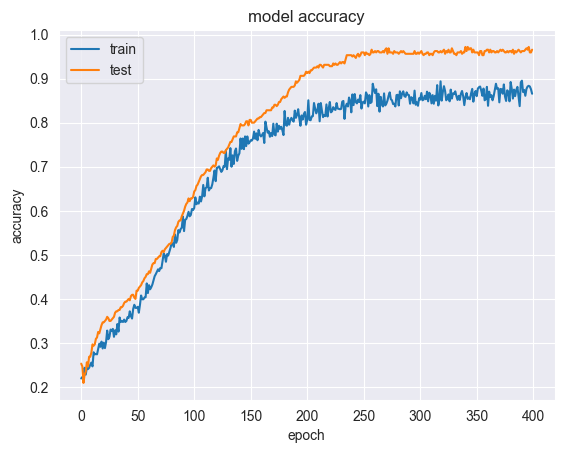

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
for col in train_data.columns:
    if col not in test_data.columns:
        print(col)


price_range


In [20]:
print(train_data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [21]:
print(test_data.columns)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [22]:
print("Evaluate on test data")
results = model.evaluate(x_test_array, y_test_array, batch_size=24)
print("test loss, test acc:", results)

Evaluate on test data
17/17 [==============================] - 0s 1ms/step - loss: 0.3849 - acc: 0.9275
test loss, test acc: [0.3849094808101654, 0.9275000095367432]


In [25]:
pred = model.predict(x_test_array)


13/13 [==============================] - 0s 1ms/step


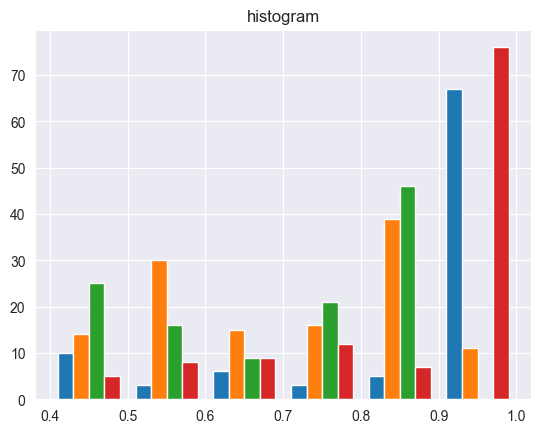

In [27]:
arr = np.array(pred)
plt.hist(arr, bins = [0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.title("histogram")
plt.show()